### LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries are imported')

Libraries are imported


### READ FILES

In [2]:
file_name = r"C:\Users\Poornima\Documents\KPMG\KPMG.xlsx"
print(pd.ExcelFile(file_name).sheet_names)

['Transactions', 'NewCustomerList', 'CustomerDemographic', 'CustomerAddress']


In [3]:
demographic_df = pd.read_excel(file_name, sheet_name= 'CustomerDemographic',  index_col=0)
address_df = pd.read_excel(file_name, sheet_name= 'CustomerAddress',  index_col=0)
transactions_df = pd.read_excel(file_name, sheet_name= 'Transactions',  index_col=0)
newcustomer_df = pd.read_excel(file_name, sheet_name= 'NewCustomerList',  index_col=0)

print('files read successfully')

files read successfully


### DATA EXPLORING AND CLEANSING

#### FILE 1 - CUSTOMER DEMOGRAPHIC

In [4]:
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
s.no,,,,,,,,,,,,
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [5]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [6]:
demographic_df.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [7]:
demographic_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [8]:
#dropping necessary null values

demographic_df = demographic_df[-demographic_df['DOB'].isnull()]
demographic_df = demographic_df[-demographic_df['job_title'].isnull()]
demographic_df = demographic_df[-demographic_df['job_industry_category'].isnull()]
demographic_df = demographic_df[-demographic_df['tenure'].isnull()]
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2865 non-null   int64         
 1   first_name                           2865 non-null   object        
 2   last_name                            2780 non-null   object        
 3   gender                               2865 non-null   object        
 4   past_3_years_bike_related_purchases  2865 non-null   int64         
 5   DOB                                  2865 non-null   datetime64[ns]
 6   job_title                            2865 non-null   object        
 7   job_industry_category                2865 non-null   object        
 8   wealth_segment                       2865 non-null   object        
 9   deceased_indicator                   2865 non-null   object        
 10  owns_car    

In [9]:
demographic_df.gender.unique()

array(['F', 'Male', 'Female', 'Undefined', 'Femal'], dtype=object)

In [10]:
demographic_df["gender"] = demographic_df["gender"].replace(["F", "Femal"], "Female")
demographic_df.gender.unique()

array(['Female', 'Male', 'Undefined'], dtype=object)

In [11]:
demographic_df.gender.value_counts()

Female       1483
Male         1381
Undefined       1
Name: gender, dtype: int64

In [12]:
demographic_df["DOB"]

s.no
0      1953-10-12
1      1980-12-16
2      1954-01-20
8      1973-03-10
9      1988-10-11
          ...    
3992   1974-12-05
3993   1989-04-07
3994   1975-12-12
3995   1975-08-09
3996   2001-07-13
Name: DOB, Length: 2865, dtype: datetime64[ns]

In [13]:
#creating a 'year' column

demographic_df['year'] = pd.DatetimeIndex(demographic_df['DOB']).year
demographic_df.head()


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year
s.no,,,,,,,,,,,,,
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988


In [14]:
#Age

demographic_df['age'] = 2021 - demographic_df['year'] 
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age
s.no,,,,,,,,,,,,,,
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,67
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,48
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,33


In [15]:
demographic_df[demographic_df['age'] > 90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age
s.no,,,,,,,,,,,,,,
33,34,Jephthah,Bachmann,Undefined,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1843,178


In [16]:
#178 is an unrealistic age, hence its dropped

demographic_df.drop(33 , inplace = True)

In [17]:
demographic_df[demographic_df['age'] >=90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age
s.no,,,,,,,,,,,,,,
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,1931,90


#### FILE 2 - TRANSACTIONS

In [18]:
transactions_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
s.no,,,,,,,,,,,,,,
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10


In [19]:
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  profit                   20000 n

In [20]:
transactions_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
profit                       0
product_first_sold_date    197
dtype: int64

In [21]:
transactions_df = transactions_df[-transactions_df['online_order'].isnull()]
transactions_df = transactions_df[-transactions_df['brand'].isnull()]
transactions_df = transactions_df[-transactions_df['product_line'].isnull()]
transactions_df = transactions_df[-transactions_df['product_class'].isnull()]
transactions_df = transactions_df[-transactions_df['product_size'].isnull()]
transactions_df = transactions_df[-transactions_df['standard_cost'].isnull()]
transactions_df = transactions_df[-transactions_df['product_first_sold_date'].isnull()]
transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  profit                   19445 n

In [22]:
transactions_df.duplicated().sum()

0

#### FILE 3 - CUSTOMER ADDRESS

In [23]:
address_df.head()

,customer_id,address,postcode,state,country,property_valuation
s.no,,,,,,
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [24]:
address_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 218.7+ KB


In [25]:
address_df.describe()

,customer_id,postcode,property_valuation
count,3999.000000,3999.000000,3999.000000
mean,2003.987997,2985.755939,7.514379
std,1154.576912,844.878364,2.824663
min,1.000000,2000.000000,1.000000
25%,1004.500000,2200.000000,6.000000
50%,2004.000000,2768.000000,8.000000
75%,3003.500000,3750.000000,10.000000
max,4003.000000,4883.000000,12.000000


In [26]:
address_df["state"].value_counts().to_frame()

,state
NSW,2140
VIC,1021
QLD,838


In [27]:
address_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

#### FILE 4 - NEW CUSTOMER LIST

In [28]:
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,Unnamed: 242,Unnamed: 243,Unnamed: 244,Unnamed: 245,Unnamed: 246,Unnamed: 247,Unnamed: 248,Unnamed: 249,Unnamed: 250,Unnamed: 251
s.no,,,,,,,,,,,,,,,,,,,,,
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Columns: 251 entries, first_name to Unnamed: 251
dtypes: datetime64[ns](1), float64(234), int64(5), object(11)
memory usage: 1.9+ MB


In [30]:
newcustomer_df.dropna(how = 'all', axis= 1, inplace = True)
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
s.no,,,,,,,,,,,,,,,,,,
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125


In [31]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [32]:
newcustomer_df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Rank                                     0
Value                                    0
dtype: int64

In [33]:
newcustomer_df.duplicated().sum()

0

In [34]:
newcustomer_df['year'] = pd.DatetimeIndex(newcustomer_df['DOB']).year
newcustomer_df['age'] = 2021 - newcustomer_df['year']
newcustomer_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,year,age
s.no,,,,,,,,,,,,,,,,,,,,
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957.0,64.0
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970.0,51.0
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974.0,47.0
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979.0,42.0
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965.0,56.0


In [35]:
newcustomer_df[newcustomer_df['age'] > 90]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value,year,age
s.no,,,,,,,,,,,,,,,,,,,,


In [36]:
#adding customer id column , for that we need to know the last customer ID from customer demographic.
demographic_df.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age
s.no,,,,,,,,,,,,,,
3992,3993,Andi,Dumelow,Female,6,1974-12-05,Librarian,Entertainment,Mass Customer,N,No,10.0,1974,47
3993,3994,Stephie,Byars,Female,5,1989-04-07,Structural Analysis Engineer,Manufacturing,Affluent Customer,N,No,12.0,1989,32
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,1975,46
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,1975,46
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,2001,20


In [37]:
#we will continue from 3998 for Newcustomerlist's customer ID

newcustomer_df.insert(0, 'customer_id', range(3998, 3998 + len(newcustomer_df)))
newcustomer_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,Rank,Value,year,age
s.no,,,,,,,,,,,,,,,,,,,,,
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,14,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957.0,64.0
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,16,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970.0,51.0
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,10,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974.0,47.0
3,4001,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,5,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979.0,42.0
4,4002,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,19,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965.0,56.0


In [38]:
#adding age groups column
newcustomer_df['agegroup'] = pd.cut(newcustomer_df.age, [0,25,40,50,60,9999], labels=["<25", "25-40","40-50","50-60","60+"])

In [39]:
newcustomer_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,address,postcode,state,country,property_valuation,Rank,Value,year,age,agegroup
s.no,,,,,,,,,,,,,,,,,,,,,
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,45 Shopko Center,4500,QLD,Australia,6,1,1.718750,1957.0,64.0,60+
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,14 Mccormick Park,2113,NSW,Australia,11,1,1.718750,1970.0,51.0,50-60
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,...,5 Colorado Crossing,3505,VIC,Australia,5,1,1.718750,1974.0,47.0,40-50
3,4001,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,...,207 Annamark Plaza,4814,QLD,Australia,1,4,1.703125,1979.0,42.0,40-50
4,4002,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,...,115 Montana Place,2093,NSW,Australia,9,4,1.703125,1965.0,56.0,50-60


In [40]:
newcustomer_df = newcustomer_df.drop(['Rank', 'Value'], axis= 1)

In [41]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          1000 non-null   int32         
 1   first_name                           1000 non-null   object        
 2   last_name                            971 non-null    object        
 3   gender                               1000 non-null   object        
 4   past_3_years_bike_related_purchases  1000 non-null   int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            894 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car     

### MERGING DATASETS

#### CUSTOMER DEMOGRAPHIC AND CUSTOMER ADDRESS MERGING

In [42]:
#merge the dataframes using the customer ID column 
#we are merging it in the customer demographic file

demographic_df = pd.merge(demographic_df, address_df, how='left', on='customer_id')

In [43]:
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,68,060 Morning Avenue,2016.0,NSW,Australia,10.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,41,6 Meadow Vale Court,2153.0,NSW,Australia,10.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,67,NaN,NaN,NaN,NaN,NaN
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,48,97736 7th Trail,2023.0,NSW,Australia,12.0
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,33,NaN,NaN,NaN,NaN,NaN


In [44]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

#### both the datasets are merged into customer demographic successfully

In [45]:
#add column age group to the newly merged dataset

demographic_df['agegroup'] = pd.cut(demographic_df.age , [0,25,40,50,60,9999], labels=['<25',"25-40","40-50","50-60","60+"])

In [46]:
demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,age,address,postcode,state,country,property_valuation,agegroup
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,68,060 Morning Avenue,2016.0,NSW,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,41,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,48,97736 7th Trail,2023.0,NSW,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,33,NaN,NaN,NaN,NaN,NaN,25-40


In [47]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

In [48]:
newcustomer_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          1000 non-null   int32         
 1   first_name                           1000 non-null   object        
 2   last_name                            971 non-null    object        
 3   gender                               1000 non-null   object        
 4   past_3_years_bike_related_purchases  1000 non-null   int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            894 non-null    object        
 7   job_industry_category                835 non-null    object        
 8   wealth_segment                       1000 non-null   object        
 9   deceased_indicator                   1000 non-null   object        
 10  owns_car     

In [49]:
names = list(demographic_df.columns)
names

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'year',
 'age',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'agegroup']

In [50]:
names[12],names[13],names[14],names[15],names[16],names[17],names[18]= names[14],names[15],names[16],names[17],names[18],names[12],names[13]
names

['customer_id',
 'first_name',
 'last_name',
 'gender',
 'past_3_years_bike_related_purchases',
 'DOB',
 'job_title',
 'job_industry_category',
 'wealth_segment',
 'deceased_indicator',
 'owns_car',
 'tenure',
 'address',
 'postcode',
 'state',
 'country',
 'property_valuation',
 'year',
 'age',
 'agegroup']

In [51]:
demographic_df = demographic_df[names]
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

#### CUSTOMER DEMOGRAPHIC AND NEW CUSTOMER LIST MERGING

In [52]:
new_df = pd.concat([demographic_df, newcustomer_df], ignore_index= True, sort= False)

In [53]:
new_df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,age,agegroup
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,060 Morning Avenue,2016.0,NSW,Australia,10.0,1953.0,68.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,6 Meadow Vale Court,2153.0,NSW,Australia,10.0,1980.0,41.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,NaN,NaN,NaN,NaN,NaN,1954.0,67.0,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,97736 7th Trail,2023.0,NSW,Australia,12.0,1973.0,48.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,NaN,NaN,NaN,NaN,NaN,1988.0,33.0,25-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3859,4993,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,9.0,2 Sloan Way,2200.0,NSW,Australia,7.0,1959.0,62.0,60+
3860,4994,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,6.0,04 Union Crossing,2196.0,NSW,Australia,10.0,2001.0,20.0,<25
3861,4995,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,15.0,33475 Fair Oaks Junction,4702.0,QLD,Australia,2.0,1954.0,67.0,60+
3862,4996,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,19.0,57666 Victoria Way,4215.0,QLD,Australia,2.0,1952.0,69.0,60+


#### NEW_DF AND TRANSACTIONS MERGING 

In [54]:
df = transactions_df

In [55]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date
s.no,,,,,,,,,,,,,,
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10


In [56]:
df = pd.merge(df, new_df[["customer_id","gender"]], on="customer_id", how="left")

In [57]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,profit,product_first_sold_date,gender
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,17.87,2012-12-02,Male
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1702.55,2014-03-03,Female
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1544.61,1999-07-20,Male
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,817.36,1998-12-16,Male
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1055.82,2015-08-10,NaN


In [58]:
df = pd.merge(df, new_df[["customer_id","past_3_years_bike_related_purchases"]], on="customer_id", how="left")

In [59]:
df = pd.merge(df, new_df[["customer_id","age"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","agegroup"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","job_title"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","job_industry_category"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","wealth_segment"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","owns_car"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","postcode"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","state"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","property_valuation"]], on="customer_id", how="left")
df = pd.merge(df, new_df[["customer_id","country"]], on="customer_id", how="left")

In [60]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,agegroup,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,66.0,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,VIC,6.0,Australia
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,42.0,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,NSW,5.0,Australia
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,44.0,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,NSW,1.0,Australia
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,59.0,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,NSW,10.0,Australia
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df.sort_values(["transaction_date"], ascending = False)


,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,age,agegroup,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country
10617,10905,0,2659,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,...,47.0,40-50,Professor,Argiculture,High Net Worth,Yes,4151.0,QLD,4.0,Australia
2230,2285,95,3216,2017-12-30,1.0,Approved,Giant Bicycles,Standard,medium,large,...,23.0,<25,Database Administrator III,Manufacturing,Mass Customer,Yes,4390.0,QLD,7.0,Australia
7328,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,...,23.0,<25,Computer Systems Analyst II,Property,Mass Customer,No,3174.0,VIC,8.0,Australia
1008,1033,49,934,2017-12-30,0.0,Approved,Trek Bicycles,Road,medium,medium,...,25.0,<25,Human Resources Manager,Manufacturing,Mass Customer,No,2036.0,NSW,12.0,Australia
15799,16258,14,2055,2017-12-30,1.0,Approved,Solex,Standard,high,large,...,41.0,40-50,Administrative Assistant III,Retail,High Net Worth,No,2327.0,NSW,3.0,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15132,15565,46,2543,2017-01-01,1.0,Approved,Solex,Standard,low,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14782,15205,87,123,2017-01-01,0.0,Approved,OHM Cycles,Standard,medium,medium,...,33.0,25-40,Analyst Programmer,Financial Services,High Net Worth,No,2516.0,NSW,8.0,Australia
13551,13934,94,824,2017-01-01,0.0,Approved,Giant Bicycles,Standard,medium,large,...,44.0,40-50,Financial Advisor,Financial Services,Affluent Customer,Yes,4127.0,QLD,3.0,Australia
14718,15138,3,1022,2017-01-01,1.0,Approved,Trek Bicycles,Standard,medium,large,...,31.0,25-40,Assistant Manager,Financial Services,Affluent Customer,Yes,2136.0,NSW,10.0,Australia


#### The latest date of transaction would be used as the comparison date to recency.
#### Recency = comparison date - transaction date

In [62]:
df['transaction_date'] = pd.to_datetime(df['transaction_date']).dt.date

In [63]:
df['recency'] = 0

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [65]:
df.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
profit                                    0
product_first_sold_date                   0
gender                                 5379
past_3_years_bike_related_purchases    5379
age                                    5379
agegroup                               5379
job_title                              5379
job_industry_category                  5379
wealth_segment                         5379
owns_car                               5379
postcode                        

#### The transaction date contains no null values, hence it would be no difficult to calculate the recency. Otherwise , it is required to replace the NaN values to 0.

In [66]:
df

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,agegroup,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,VIC,6.0,Australia,0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,NSW,5.0,Australia,0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,NSW,1.0,Australia,0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,NSW,10.0,Australia,0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19440,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,...,25-40,Help Desk Operator,Manufacturing,Mass Customer,Yes,3109.0,VIC,10.0,Australia,0
19441,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,...,40-50,Compensation Analyst,Financial Services,Mass Customer,No,4405.0,QLD,1.0,Australia,0
19442,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,...,40-50,Staff Accountant IV,Telecommunications,High Net Worth,No,3630.0,VIC,1.0,Australia,0
19443,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [67]:
import datetime

comparison_date = datetime.date(2017, 12, 30)

for i in range(19445):
    x = comparison_date - df['transaction_date'][i]
    df["recency"][i] = x.days

<ipython-input-67-c400cdaf9802>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["recency"][i] = x.days


In [68]:
df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,agegroup,job_title,job_industry_category,wealth_segment,owns_car,postcode,state,property_valuation,country,recency
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,...,60+,Software Engineer I,Financial Services,Mass Customer,Yes,3064.0,VIC,6.0,Australia,308
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,...,40-50,Clinical Specialist,Health,Mass Customer,Yes,2196.0,NSW,5.0,Australia,223
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,...,40-50,Desktop Support Technician,Retail,Affluent Customer,No,2835.0,NSW,1.0,Australia,75
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,...,50-60,Staff Scientist,Financial Services,Mass Customer,No,2096.0,NSW,10.0,Australia,121
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90


In [69]:
df = df[-df['gender'].isnull()]
df = df[-df['postcode'].isnull()]
df.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
profit                                 0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
age                                    0
agegroup                               0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
postcode                               0
state                                  0
property_valuati

#### RFM ANALYSIS
RFM analysis is used to quantitatively rank and group customers based on the recency, frequency and monetary total of their recent transactions to identify the best customers and perform targeted marketing campaigns.

#### Only the transactions that are made in the last two years are considered for the analysis.

In [70]:
df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,age,postcode,property_valuation,recency
count,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000
mean,9997.552441,45.613064,1718.680305,0.500356,1110.645960,559.051687,551.594273,49.443290,43.706205,2999.513306,7.469546,181.657962
std,5764.570083,30.492086,1011.286420,0.500018,584.029679,409.094565,493.376642,28.683116,12.572443,859.583893,2.843888,105.541399
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.000000,19.000000,2000.000000,1.000000,0.000000
25%,5032.250000,18.000000,831.000000,0.000000,575.270000,215.140000,135.850000,25.000000,34.000000,2199.000000,6.000000,89.000000
50%,9979.500000,44.000000,1719.000000,1.000000,1163.890000,507.580000,445.210000,48.000000,44.000000,2768.000000,8.000000,181.000000
75%,14976.750000,72.000000,2593.000000,1.000000,1635.300000,795.100000,827.160000,74.000000,53.000000,3796.000000,10.000000,273.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,1702.550000,99.000000,90.000000,4883.000000,12.000000,363.000000


In [71]:
df = df[df['recency']<700]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14054 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14054 non-null  int64         
 1   product_id                           14054 non-null  int64         
 2   customer_id                          14054 non-null  int64         
 3   transaction_date                     14054 non-null  object        
 4   online_order                         14054 non-null  float64       
 5   order_status                         14054 non-null  object        
 6   brand                                14054 non-null  object        
 7   product_line                         14054 non-null  object        
 8   product_class                        14054 non-null  object        
 9   product_size                         14054 non-null  object        
 10  list_price

In [72]:
rfmTable = df.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                          'product_id': lambda x:len(x), 
                                          'profit': lambda x:x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38


In [73]:
rfmTable["monetary_value"] = rfmTable["monetary_value"].astype(int)

In [74]:
quartiles = rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

      recency  frequency  monetary_value
0.00     0.00       1.00            15.0
0.25    18.00       4.00          1785.5
0.50    45.00       5.00          2799.0
0.75    87.00       7.00          4096.0
0.99   267.79      11.79          8252.0 <class 'pandas.core.frame.DataFrame'>


In [75]:
rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,0,0,0
2,128,3,2226,0,0,0
9,78,6,2353,0,0,0
12,67,7,3540,0,0,0
13,27,7,4337,0,0,0
...,...,...,...,...,...,...
3493,93,6,3728,0,0,0
3494,4,4,2755,0,0,0
3495,13,7,3847,0,0,0


#### CALCULATING R-SCORE,  F-SCORE, AND M-SCORE

In [76]:
rfmTable.index

Int64Index([   1,    2,    9,   12,   13,   14,   15,   19,   20,   21,
            ...
            3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497],
           dtype='int64', name='customer_id', length=2522)

In [77]:
#r score

for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 76:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=76) & ((int(rfmTable["recency"][i])) > 35):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=35) & ((int(rfmTable["recency"][i])) > 8):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4

<ipython-input-77-48e1965308d4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["R_Score"][i] = 4
<ipython-input-77-48e1965308d4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["R_Score"][i] = 1
<ipython-input-77-48e1965308d4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["R_Score"][i] = 2
<ipython-input-77-48e1965308d4>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [78]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,0
2,128,3,2226,1,0,0
9,78,6,2353,1,0,0
12,67,7,3540,2,0,0
13,27,7,4337,3,0,0
...,...,...,...,...,...,...
3493,93,6,3728,1,0,0
3494,4,4,2755,4,0,0
3495,13,7,3847,3,0,0


In [79]:
#f score

for i in rfmTable.index:
    if (int(rfmTable["frequency"][i])) > 7:
        rfmTable["F_Score"][i] = 4
    elif ((int(rfmTable["frequency"][i])) <=7) & ((int(rfmTable["frequency"][i])) > 5):
        rfmTable["F_Score"][i] = 3
    elif ((int(rfmTable["frequency"][i])) <=5) & ((int(rfmTable["frequency"][i])) > 4):
        rfmTable["F_Score"][i] = 2
    else:
        rfmTable["F_Score"][i] = 1

<ipython-input-79-9fc0724bb207>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["F_Score"][i] = 4
<ipython-input-79-9fc0724bb207>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["F_Score"][i] = 1
<ipython-input-79-9fc0724bb207>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["F_Score"][i] = 3
<ipython-input-79-9fc0724bb207>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [80]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,0
2,128,3,2226,1,1,0
9,78,6,2353,1,3,0
12,67,7,3540,2,3,0
13,27,7,4337,3,3,0
...,...,...,...,...,...,...
3493,93,6,3728,1,3,0
3494,4,4,2755,4,1,0
3495,13,7,3847,3,3,0


In [81]:
#m score

for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4096:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4096) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1785):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1

<ipython-input-81-62a0987e3a4b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["M_Score"][i] = 3
<ipython-input-81-62a0987e3a4b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["M_Score"][i] = 2
<ipython-input-81-62a0987e3a4b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["M_Score"][i] = 4
<ipython-input-81-62a0987e3a4b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [82]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,4,3
2,128,3,2226,1,1,2
9,78,6,2353,1,3,2
12,67,7,3540,2,3,3
13,27,7,4337,3,3,4
...,...,...,...,...,...,...
3493,93,6,3728,1,3,3
3494,4,4,2755,4,1,2
3495,13,7,3847,3,3,3


In [83]:
#RFM Value

rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]

<ipython-input-83-363e30a59d76>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]


In [84]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,7,11,3018,4,4,3,443
2,128,3,2226,1,1,2,112
9,78,6,2353,1,3,2,132
12,67,7,3540,2,3,3,233
13,27,7,4337,3,3,4,334
...,...,...,...,...,...,...,...
3493,93,6,3728,1,3,3,133
3494,4,4,2755,4,1,2,412
3495,13,7,3847,3,3,3,333


In [85]:
quartiles = rfmTable["RFM_Value"].quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

0.00    111.0
0.25    133.0
0.50    234.0
0.75    333.0
0.99    444.0
Name: RFM_Value, dtype: float64 <class 'pandas.core.series.Series'>


In [86]:
rfmTable["Customer_Profile"] = " "

In [87]:
for i in rfmTable.index:
    if (int(rfmTable["RFM_Value"][i])) > 411:
        rfmTable["Customer_Profile"][i] = "Platinum Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=411) & ((int(rfmTable["RFM_Value"][i])) > 311):
        rfmTable["Customer_Profile"][i] = "Silver Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=311) & ((int(rfmTable["RFM_Value"][i])) > 160):
        rfmTable["Customer_Profile"][i] = "Gold Customer"
    else:
        rfmTable["Customer_Profile"][i] = "Bronze Customer"

<ipython-input-87-c0e92c93a55b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["Customer_Profile"][i] = "Platinum Customer"
<ipython-input-87-c0e92c93a55b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["Customer_Profile"][i] = "Bronze Customer"
<ipython-input-87-c0e92c93a55b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rfmTable["Customer_Profile"][i] = "Gold Customer"
<ipython-input-87-c0e92c93a55b>:5: Setti

In [88]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value,Customer_Profile
customer_id,,,,,,,,
1,7,11,3018,4,4,3,443,Platinum Customer
2,128,3,2226,1,1,2,112,Bronze Customer
9,78,6,2353,1,3,2,132,Bronze Customer
12,67,7,3540,2,3,3,233,Gold Customer
13,27,7,4337,3,3,4,334,Silver Customer
...,...,...,...,...,...,...,...,...
3493,93,6,3728,1,3,3,133,Bronze Customer
3494,4,4,2755,4,1,2,412,Platinum Customer
3495,13,7,3847,3,3,3,333,Silver Customer


### DATA VISUALISATION

#### PLOTTING CUSTOMER PROFILE VS CUSTOMER VALUE


In [89]:
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()

Customer_Profile
Bronze Customer       91221
Gold Customer        190803
Platinum Customer    123054
Silver Customer      225884
Name: RFM_Value, dtype: int64

In [90]:
#a dataframe is created, so it would be easier to plot graphs

customerprofile = rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()
customerprofile

Customer_Profile
Bronze Customer       91221
Gold Customer        190803
Platinum Customer    123054
Silver Customer      225884
Name: RFM_Value, dtype: int64

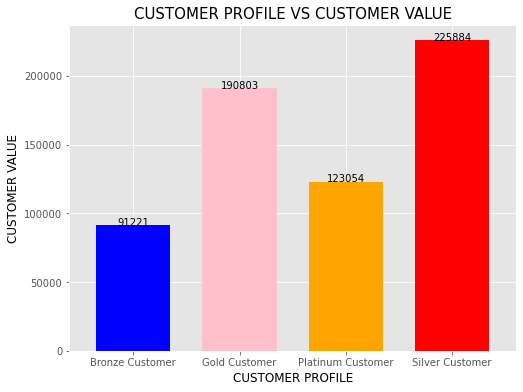

In [91]:
#plotting customer profile vs customer values

plt.figure(figsize=[8,6])
plt.style.use('ggplot')
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum().plot(kind="bar", width=0.7, color=["blue","pink","orange","red"])
plt.title("CUSTOMER PROFILE VS CUSTOMER VALUE", fontsize = 15)
plt.xlabel("CUSTOMER PROFILE", fontsize=12,color="black")
plt.ylabel("CUSTOMER VALUE",fontsize=12, color="black")

label = customerprofile.values
for i in range(4):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=10)
plt.xticks(rotation=0)      
plt.show()



#### FINDING WHICH AGE GROUPS FROM DIFFERENT WEALTH SEGMENTS BRING MORE PROFIT

In [92]:
profit = pd.pivot_table(data = df, index = 'agegroup', columns='wealth_segment', values='profit', aggfunc=np.sum)
profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
agegroup,,,
<25,173670.45,165303.58,397729.24
25-40,556516.09,542702.42,975912.29
40-50,626030.45,681495.37,1356499.08
50-60,340137.99,360956.51,676747.74
60+,233502.02,215472.67,449430.01


In [93]:
profit["Affluent Customer"] = profit["Affluent Customer"].astype(int)
profit["High Net Worth"] = profit["High Net Worth"].astype(int)
profit["Mass Customer"] = profit["Mass Customer"].astype(int)

In [94]:
profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
agegroup,,,
<25,173670,165303,397729
25-40,556516,542702,975912
40-50,626030,681495,1356499
50-60,340137,360956,676747
60+,233502,215472,449430


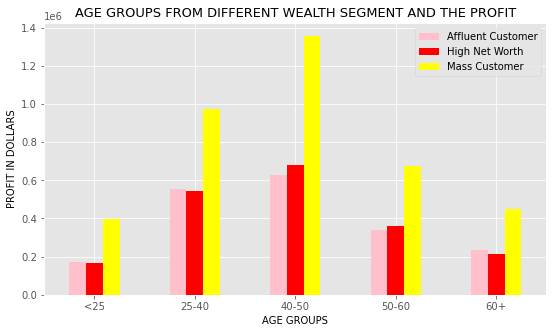

In [95]:
pd.pivot_table(data= df, index="agegroup", columns="wealth_segment", values="profit",aggfunc=np.sum).plot(kind='bar', figsize=[9,5], color=["pink","red","yellow"])
plt.title("AGE GROUPS FROM DIFFERENT WEALTH SEGMENT AND THE PROFIT", fontsize=13)
plt.xlabel("AGE GROUPS", fontsize=10,color="black")
plt.ylabel("PROFIT IN DOLLARS",fontsize=10, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.show()

#### FINDING WHICH AGE AND GENDER GROUPS PURCHASED MORE BIKE RELATED THINGS IN THE PAST THREE YEARS

In [96]:
pd.pivot_table(data=df, index="gender", columns="agegroup", values="past_3_years_bike_related_purchases",aggfunc='count')

agegroup,<25,25-40,40-50,50-60,60+
gender,,,,,
Female,683,1845,2536,1235,836
Male,670,1861,2354,1202,832


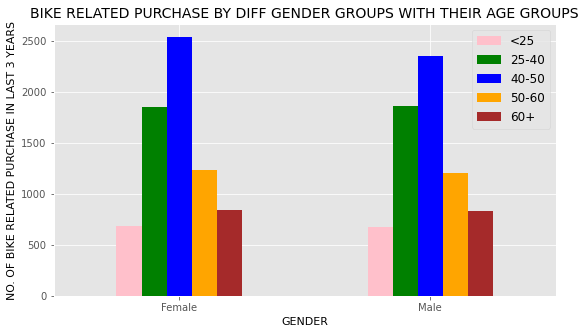

In [97]:
pd.pivot_table(data=df, index="gender", columns="agegroup", values="past_3_years_bike_related_purchases",aggfunc='count').plot(kind='bar',figsize=[9,5], color=["pink","green","blue","orange","brown"])

plt.title("BIKE RELATED PURCHASE BY DIFF GENDER GROUPS WITH THEIR AGE GROUPS", fontsize=14)
plt.xlabel("GENDER", fontsize=11,color="black")
plt.ylabel("NO. OF BIKE RELATED PURCHASE IN LAST 3 YEARS",fontsize=11, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.grid(True)
plt.xticks(rotation=0)

plt.show()

#### JOB INDUSTRY SECTOR VS BIKE RELATED PURCHASE IN THE PAST THREE YEARS

In [98]:
df.groupby(["job_industry_category"])["past_3_years_bike_related_purchases"].count()

job_industry_category
Argiculture            485
Entertainment          625
Financial Services    3341
Health                2733
IT                     584
Manufacturing         3432
Property              1091
Retail                1451
Telecommunications     312
Name: past_3_years_bike_related_purchases, dtype: int64

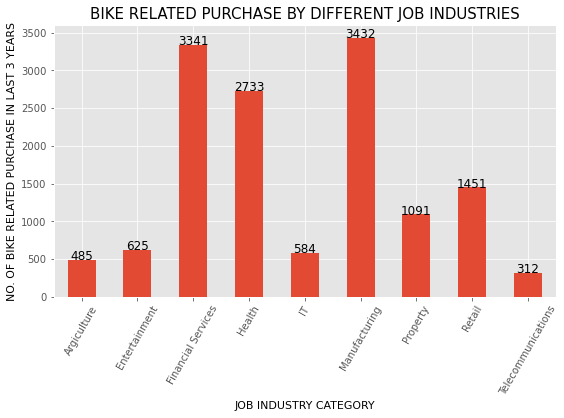

In [99]:
df.groupby(["job_industry_category"])["past_3_years_bike_related_purchases"].count().plot(kind='bar',figsize=[9,5])

plt.title("BIKE RELATED PURCHASE BY DIFFERENT JOB INDUSTRIES", fontsize=15)
plt.xlabel("JOB INDUSTRY CATEGORY", fontsize=11,color="black")
plt.ylabel("NO. OF BIKE RELATED PURCHASE IN LAST 3 YEARS",fontsize=11, color="black")
plt.grid(True)
plt.xticks(rotation=60)
label = df.groupby(["job_industry_category"])["past_3_years_bike_related_purchases"].count()
for i in range(9):
    plt.text(x = i, y = label[i], s = label[i],horizontalalignment='center',rotation = 360, color = "black", fontsize=12)

plt.show()

#### JOB INDUSTRY CATEGORY VS PROFIT

In [100]:
df.groupby(["job_industry_category"])["profit"].sum().round()

job_industry_category
Argiculture            256388.0
Entertainment          345259.0
Financial Services    1898996.0
Health                1480275.0
IT                     318906.0
Manufacturing         1868154.0
Property               597923.0
Retail                 818723.0
Telecommunications     167483.0
Name: profit, dtype: float64

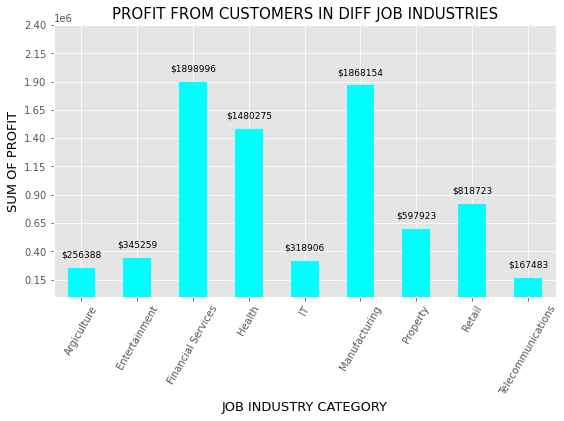

In [101]:
df.groupby(["job_industry_category"]).profit.sum().plot(kind='bar',figsize=[9,5], color="cyan")

plt.title("PROFIT FROM CUSTOMERS IN DIFF JOB INDUSTRIES", fontsize=15)
plt.xlabel("JOB INDUSTRY CATEGORY", fontsize=13,color="black")
plt.ylabel("SUM OF PROFIT",fontsize=13, color="black")
plt.grid(True)
plt.xticks(rotation=60)
plt.yticks(np.arange(150000,2500000,250000))
label =df.groupby(["job_industry_category"])["profit"].sum().round()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+"$"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=9)

plt.show()

#### PROFIT FROM DIFFERENT WEALTH SEGMENT IN EACH STATE

In [102]:
state_profit = pd.pivot_table(data = df, index = 'state', columns='wealth_segment', values='profit', aggfunc=np.sum)
state_profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
state,,,
NSW,981339.69,1081062.23,2023462.79
QLD,444262.23,404122.75,867945.93
VIC,504255.08,480745.57,964909.64


In [103]:
state_profit["Affluent Customer"] = state_profit["Affluent Customer"].astype(int)
state_profit["High Net Worth"] = state_profit["High Net Worth"].astype(int)
state_profit["Mass Customer"] = state_profit["Mass Customer"].astype(int)
state_profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
state,,,
NSW,981339,1081062,2023462
QLD,444262,404122,867945
VIC,504255,480745,964909


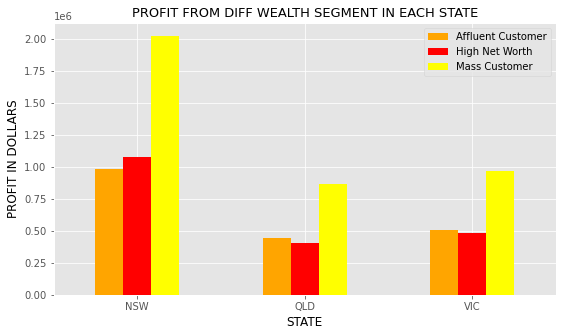

In [104]:
pd.pivot_table(data = df, index = 'state', columns='wealth_segment', values='profit', aggfunc=np.sum).plot(kind='bar', figsize=[9,5], color=["orange","red","yellow"])
plt.title("PROFIT FROM DIFF WEALTH SEGMENT IN EACH STATE", fontsize=13)
plt.xlabel("STATE", fontsize=12,color="black")
plt.ylabel("PROFIT IN DOLLARS",fontsize=12, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.show()

#### NUMBER OF CAR OWNERS IN EACH STATE

In [105]:
df["owns_car"].value_counts()

Yes    7111
No     6943
Name: owns_car, dtype: int64

In [106]:
df["owncars"]=np.where(df["owns_car"]=="Yes",1,0)

In [107]:
df.groupby(["state","owncars"])["owncars"].count()

state  owncars
NSW    0          3647
       1          3791
QLD    0          1555
       1          1555
VIC    0          1741
       1          1765
Name: owncars, dtype: int64

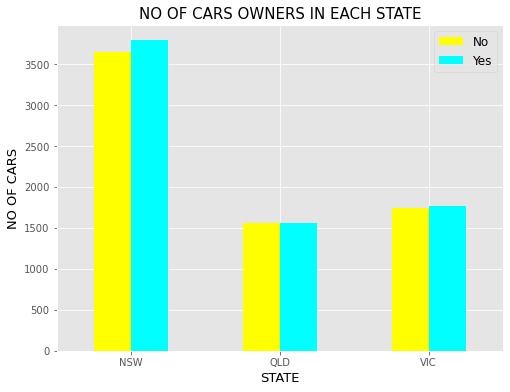

In [108]:
pd.pivot_table(data=df, index="state", columns="owns_car", values="owncars",aggfunc='count').plot(kind='bar',figsize=[8,6], color=["yellow","cyan"])
plt.title("NO OF CARS OWNERS IN EACH STATE", fontsize=15)
plt.xlabel("STATE", fontsize=13,color="black")
plt.ylabel("NO OF CARS",fontsize=13, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.xticks(rotation=0)

plt.show()

#### BRAND VS PROFIT

In [109]:
brand_profit = pd.pivot_table(data = df, index = 'brand', columns='wealth_segment', values='profit', aggfunc=np.sum)
brand_profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
brand,,,
Giant Bicycles,279278.83,287880.31,537726.82
Norco Bicycles,148441.55,161327.00,308882.53
OHM Cycles,267188.65,260390.45,518311.23
Solex,428896.88,437539.71,856708.22
Trek Bicycles,349308.91,339139.92,653928.90
WeareA2B,456742.18,479653.16,980760.66


In [110]:
brand_profit["Affluent Customer"] = brand_profit["Affluent Customer"].astype(int)
brand_profit["High Net Worth"] = brand_profit["High Net Worth"].astype(int)
brand_profit["Mass Customer"] = brand_profit["Mass Customer"].astype(int)
brand_profit

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
brand,,,
Giant Bicycles,279278,287880,537726
Norco Bicycles,148441,161327,308882
OHM Cycles,267188,260390,518311
Solex,428896,437539,856708
Trek Bicycles,349308,339139,653928
WeareA2B,456742,479653,980760


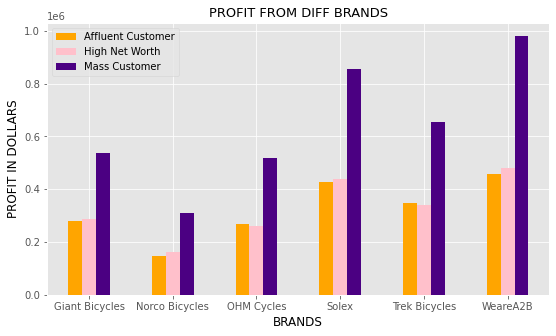

In [115]:
pd.pivot_table(data = df, index = 'brand', columns='wealth_segment', values='profit', aggfunc=np.sum).plot(kind='bar', figsize=[9,5], color=["orange","pink","indigo"])
plt.title("PROFIT FROM DIFF BRANDS", fontsize=13)
plt.xlabel("BRANDS", fontsize=12,color="black")
plt.ylabel("PROFIT IN DOLLARS",fontsize=12, color="black")
plt.legend(loc='upper left',fontsize= 10)
plt.xticks(rotation=0)

plt.show()